In [ ]:
#!pip install geopy

In [16]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
import gmaps
from pprint import pprint
from geopy.geocoders import GoogleV3
import googlemaps



# Census & gmaps API Keys
import sys
sys.path.append('../..')
from config import gkey, census_api_key
gmaps = googlemaps.Client(key=gkey)

c_2013 = Census(census_api_key, year=2013)
c_2014 = Census(census_api_key, year=2014)
c_2015 = Census(census_api_key, year=2015)


# Configure gmaps
#gmaps.configure(api_key=gkey)

In [17]:
# Run Census Search to retrieve data on all states
# Note the addition of "B23025_005E" for unemployment count
# use https://gist.github.com/afhaque/60558290d6efd892351c4b64e5c01e9b

census_data_2013 = c_2013.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E",
                          "B17001_002E",
                          "B23025_005E",
                          "B25077_001E"), {'for': 'zip code tabulation area:*'})


census_data_2014 = c_2014.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E",
                          "B17001_002E",
                          "B23025_005E",
                          "B25077_001E"), {'for': 'zip code tabulation area:*'})

census_data_2015 = c_2015.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E",
                          "B17001_002E",
                          "B23025_005E",
                          "B25077_001E"), {'for': 'zip code tabulation area:*'})

# Convert to DataFrame
census_pd_2013 = pd.DataFrame(census_data_2013)
census_pd_2014 = pd.DataFrame(census_data_2014)
census_pd_2015 = pd.DataFrame(census_data_2015)






In [18]:
#building out each year

census_pd_2013["Year"]=2013
census_pd_2014["Year"]=2014
census_pd_2015["Year"]=2015


census_pd=census_pd_2013
census_pd=census_pd.append(census_pd_2014)
census_pd=census_pd.append(census_pd_2015)




In [19]:

# Column Reordering
census_pd = census_pd.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B17001_002E": "Poverty Count",
                                      "B23025_005E": "Unemployment Count",
                                      "B25077_001E": "Median Home Value",
                                      "NAME": "Name", "zip code tabulation area": "Zip Code"})

# Add in Poverty Rate (Poverty Count / Population)
census_pd["Poverty Rate"] = 100 * \
    census_pd["Poverty Count"].astype(
        int) / census_pd["Population"].astype(int)

# Add in Employment Rate (Employment Count / Population)
census_pd["Unemployment Rate"] = 100 * \
    census_pd["Unemployment Count"].astype(
        int) / census_pd["Population"].astype(int)

# Final DataFrame
census_pd = census_pd[["Year","Zip Code", "Name", "Population", "Median Age", "Household Income", "Poverty Count", "Poverty Rate", "Unemployment Rate","Median Home Value"]]

#remove the negative values of median home value...
census_pd = census_pd[((census_pd['Median Home Value'] >= 0) | (census_pd['Median Home Value'].isnull())) & ((census_pd['Household Income']>=0)|(census_pd['Household Income'].isnull()))]


census_pd.tail(20)

,Year,Zip Code,Name,Population,Median Age,Household Income,Poverty Count,Poverty Rate,Unemployment Rate,Median Home Value
33100,2015,99827,ZCTA5 99827,2626.0,45.8,58700.0,142.0,5.407464,1.942117,207500.0
33101,2015,99829,ZCTA5 99829,821.0,42.6,57708.0,134.0,16.321559,8.891596,162200.0
33102,2015,99830,ZCTA5 99830,628.0,36.6,40417.0,136.0,21.656051,13.057325,137500.0
33103,2015,99832,ZCTA5 99832,87.0,52.2,67083.0,0.0,0.000000,10.344828,252100.0
33104,2015,99833,ZCTA5 99833,3221.0,40.4,67935.0,327.0,10.152127,4.719031,218800.0
33105,2015,99835,ZCTA5 99835,8943.0,38.9,70376.0,798.0,8.923180,2.113385,338600.0
33106,2015,99836,ZCTA5 99836,31.0,40.1,82813.0,0.0,0.000000,0.000000,98800.0
33107,2015,99840,ZCTA5 99840,999.0,43.7,69318.0,44.0,4.404404,5.705706,324600.0
33108,2015,99841,ZCTA5 99841,150.0,54.5,54375.0,3.0,2.000000,0.000000,240900.0
33109,2015,99901,ZCTA5 99901,13717.0,38.7,64222.0,1640.0,11.955967,4.170008,252500.0


In [5]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
census_pd.to_csv("census_data_zip.csv", encoding="utf-8", index=False)

In [20]:
#now time to get in the tornado data
initial_tornadoes_pd = pd.read_csv("../Resources/Tornado_Data_1950to2015.csv")

#initial_tornadoes_pd.head()

new_tornadoes_pd=initial_tornadoes_pd[(initial_tornadoes_pd['Year']>= 2013)]


#and now I have to convert the 
#base_url="https://maps.googleapis.com/maps/api/geocode/json?latlng={0}&key={1}"
new_tornadoes_pd["Zip Code"]=""
for index, row in new_tornadoes_pd.iterrows():
    try:
        address=gmaps.reverse_geocode((row["Starting Latitude"], row["Starting Longitude"]))
        new_tornadoes_pd.loc[index,"Zip Code"]=address[0]["formatted_address"][-10:-5]
    except IndexError:
        new_tornadoes_pd.loc[index,"Zip Code"]='null'
        



C:\Users\jawhite\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\jawhite\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [21]:
new_tornadoes_pd.tail(20)
new_tornadoes_pd.to_csv("new_tornadoes_pd.csv", encoding="utf-8", index=False)

In [23]:
# Convert poverty rate as a list
# Convert bank rate to list
temp=new_tornadoes_pd.groupby(["Year","Zip Code"]).count().reset_index()
temp.head()


,Year,Zip Code,Tornado Number per Year,Month,Day,Date,Time,TimeZone,State,State FIPS Number,...,Fatalities,Property Loss ($),Crop Loss (millions $),Starting Latitude,Starting Longitude,Ending Latitude,Ending Longitude,Length (miles),Width (yards),fc
0,2013,02072,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,2013,04424,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,2013,04462,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,2013,04732,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,2013,04920,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [24]:
#build combined DF
final_df=pd.merge(temp[["Year","Zip Code","Tornado Number per Year"]],census_pd,how="left",on=["Year","Zip Code"])
final_df.head()

,Year,Zip Code,Tornado Number per Year,Name,Population,Median Age,Household Income,Poverty Count,Poverty Rate,Unemployment Rate,Median Home Value
0,2013,02072,1,ZCTA5 02072,27522.0,43.1,74262.0,2058.0,7.477654,4.890633,315700.0
1,2013,04424,1,ZCTA5 04424,797.0,47.5,38098.0,189.0,23.713927,7.402760,68400.0
2,2013,04462,1,ZCTA5 04462,4831.0,51.3,37450.0,463.0,9.583937,3.560339,66500.0
3,2013,04732,1,ZCTA5 04732,1746.0,41.7,36250.0,244.0,13.974800,6.013746,79200.0
4,2013,04920,1,ZCTA5 04920,1727.0,48.6,29028.0,370.0,21.424435,4.690214,82600.0


In [26]:
#kfja;lkdsj
#tmp=pd.read_csv("new_tornadoes_pd.csv")

#cens=pd.read_csv("census_data_zip.csv")
#cens.head()


#tmp["Year"]=tmp["Year"].astype(int)
#cens["Year"]=

#final_df=pd.merge(tmp[["Year","Zip Code","Tornado Number per Year"]],cens,how="left",on=["Year","Zip Code"])


#finding top zip codes by frequency of tornadoes in 2013
final_df.loc[final_df['Year'] == 2013].sort_values(by=['Tornado Number per Year']).tail(5)

,Year,Zip Code,Tornado Number per Year,Name,Population,Median Age,Household Income,Poverty Count,Poverty Rate,Unemployment Rate,Median Home Value
301,2013,50441,3,ZCTA5 50441,5846.0,41.6,48886.0,663.0,11.341088,2.873760,87700.0
230,2013,43535,3,ZCTA5 43535,712.0,39.2,42330.0,195.0,27.387640,8.848315,88600.0
640,2013,74036,4,ZCTA5 74036,6433.0,41.0,50972.0,509.0,7.912327,2.689259,120900.0
609,2013,73036,4,ZCTA5 73036,18888.0,39.0,48938.0,2346.0,12.420584,3.213681,90000.0
744,2013,80720,5,ZCTA5 80720,2831.0,43.8,45472.0,343.0,12.115860,2.154716,101200.0


In [27]:
#finding top zip codes by frequency of tornadoes in 2014
final_df.loc[final_df['Year'] == 2014].sort_values(by=['Tornado Number per Year']).tail(5)

,Year,Zip Code,Tornado Number per Year,Name,Population,Median Age,Household Income,Poverty Count,Poverty Rate,Unemployment Rate,Median Home Value
1083,2014,46356,4,ZCTA5 46356,17626.0,37.9,63283.0,1626.0,9.225009,4.232384,167700.0
1241,2014,60940,4,ZCTA5 60940,3636.0,39.0,69329.0,163.0,4.482948,7.123212,182000.0
1206,2014,57382,5,ZCTA5 57382,1530.0,48.0,52679.0,155.0,10.130719,0.392157,71700.0
1476,2014,80102,5,ZCTA5 80102,5136.0,41.9,62440.0,468.0,9.112150,5.938474,235400.0
1372,2014,68823,6,ZCTA5 68823,2217.0,50.8,42679.0,238.0,10.735228,2.165088,91300.0


In [28]:
#finding top zip codes by frequency of tornadoes in 2015
final_df.loc[final_df['Year'] == 2015].sort_values(by=['Tornado Number per Year']).tail(5)

,Year,Zip Code,Tornado Number per Year,Name,Population,Median Age,Household Income,Poverty Count,Poverty Rate,Unemployment Rate,Median Home Value
1878,2015,56271,6,ZCTA5 56271,1188.0,41.2,55329.0,143.0,12.037037,2.861953,108700.0
1716,2015,39051,6,ZCTA5 39051,16328.0,34.9,33661.0,4464.0,27.339539,4.789319,75800.0
2445,2015,79735,7,ZCTA5 79735,13683.0,35.7,48425.0,1449.0,10.589783,2.112110,69400.0
2468,2015,80832,7,ZCTA5 80832,539.0,45.9,47212.0,71.0,13.172542,3.710575,150500.0
2470,2015,80835,7,ZCTA5 80835,889.0,45.7,57292.0,102.0,11.473566,3.937008,212500.0


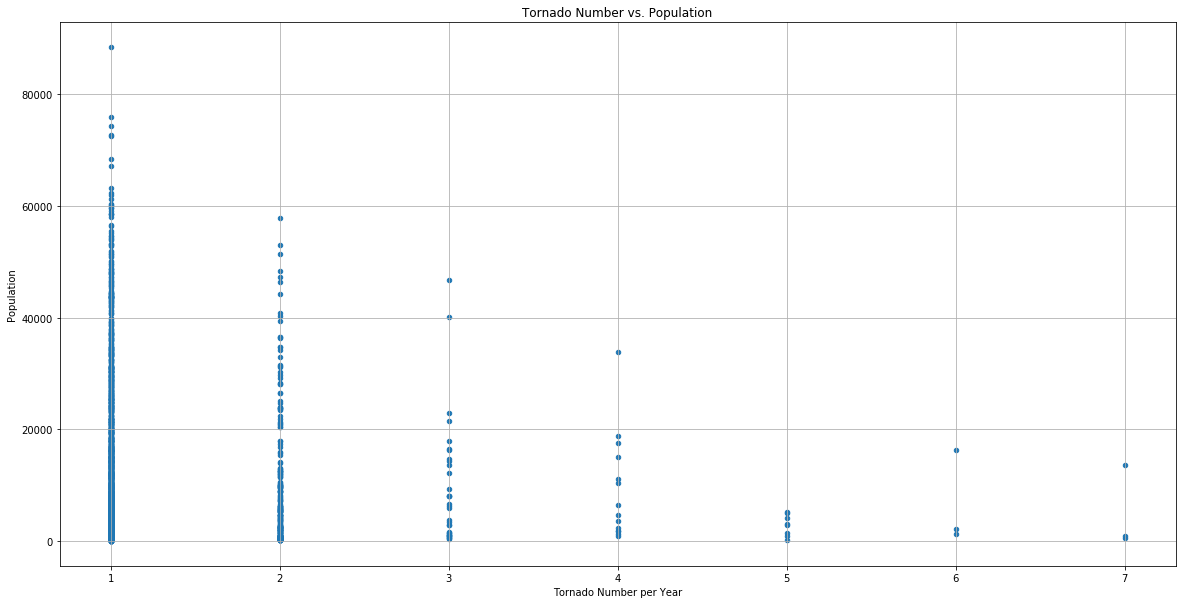

In [25]:
tornadoes_pop=final_df.plot(kind="scatter", x="Tornado Number per Year", y="Population", grid=True, figsize=(20,10),
              title="Tornado Number vs. Population")
tornadoes_pop

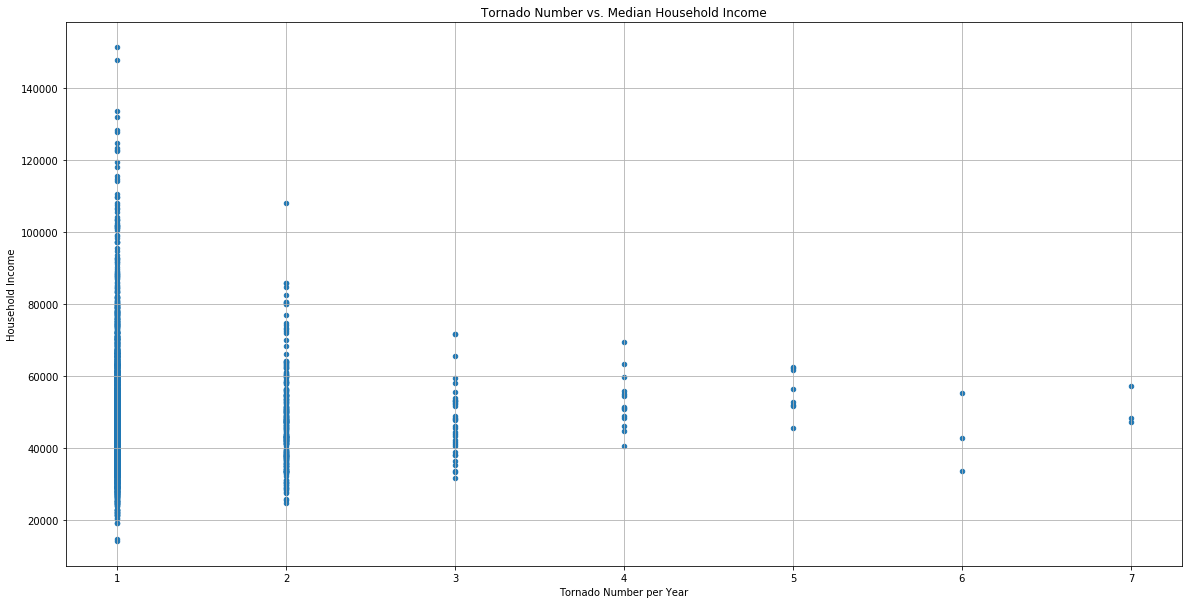

In [27]:
tornadoes_income=final_df.plot(kind="scatter", x="Tornado Number per Year", y="Household Income", grid=True, figsize=(20,10),
              title="Tornado Number vs. Median Household Income")

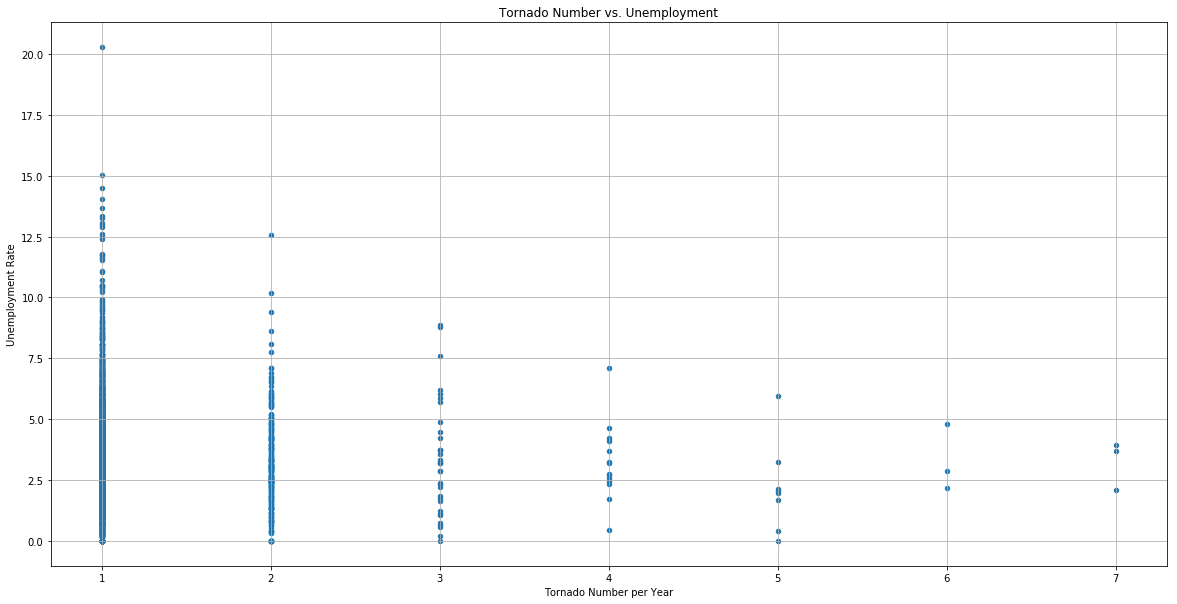

In [28]:
tornadoes_unemployment=final_df.plot(kind="scatter", x="Tornado Number per Year", y="Unemployment Rate", grid=True, figsize=(20,10),
              title="Tornado Number vs. Unemployment")

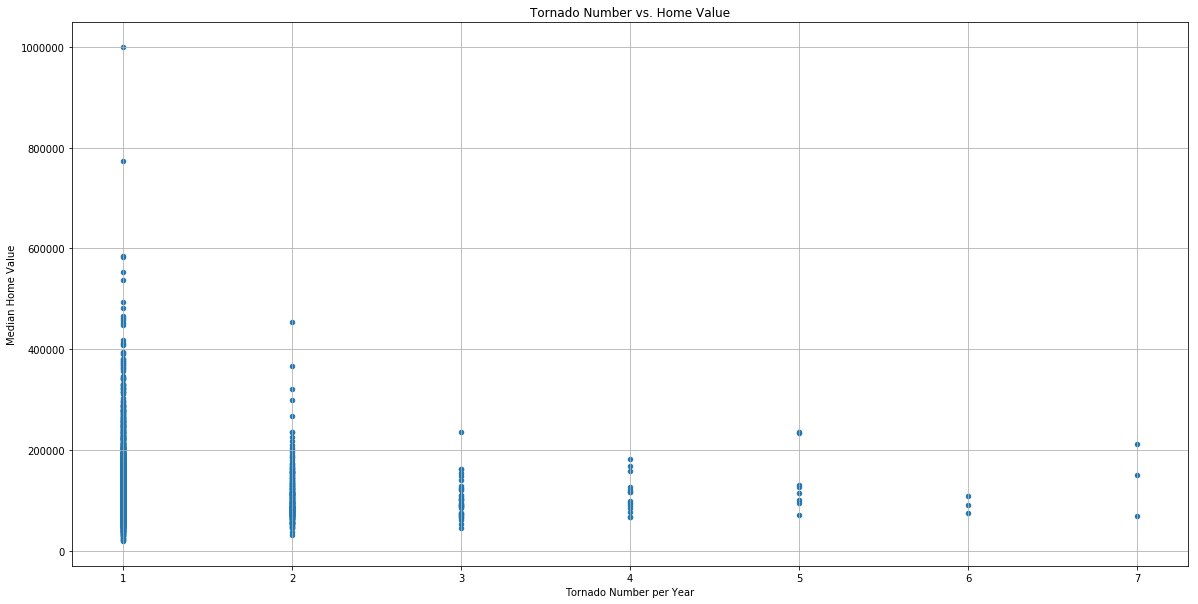

In [31]:
tornadoes_homevalue=final_df.plot(kind="scatter", x="Tornado Number per Year", y="Median Home Value", grid=True, figsize=(20,10),
              title="Tornado Number vs. Home Value")